In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import kendalltau
import numpy as np

rcParams['figure.dpi'] = 150

fs_6grid = (8,12)
fs_4grid = (8, 8)
fs_grid = (4,4)

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df6 = pd.read_csv("MI_Gaussian_grids.csv", index_col=0)
df6 = df6.replace(np.nan, 0)
df4 = df6[df6['Estimator'].isin(['LMI',
                                 'MINE',
                                 'InfoNCE',
                                 'KSG'])]

c6 = ['#c4bae2','#40ada6','#3c4ebf',  
        '#e3a600', '#edb1a3', '#d6543a',]
c4 = [c6[c] for c in range(6) if c in [1,2,3,5]]

In [3]:
g6 = df6.groupby(['Ambient dimensions', 'Intrinsic dimensions', 'Estimator'])
g4 = df4.groupby(['Ambient dimensions', 'Intrinsic dimensions', 'Estimator'])

def kendall(group):
    t = group['True MI']
    e = group['Estimate']
    return kendalltau(t, e)[0]

def mse(group):
    t = group['True MI']
    e = group['Estimate']
    return np.mean(np.abs(t-e)**2)

/tmp/ipykernel_321456/4193454867.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


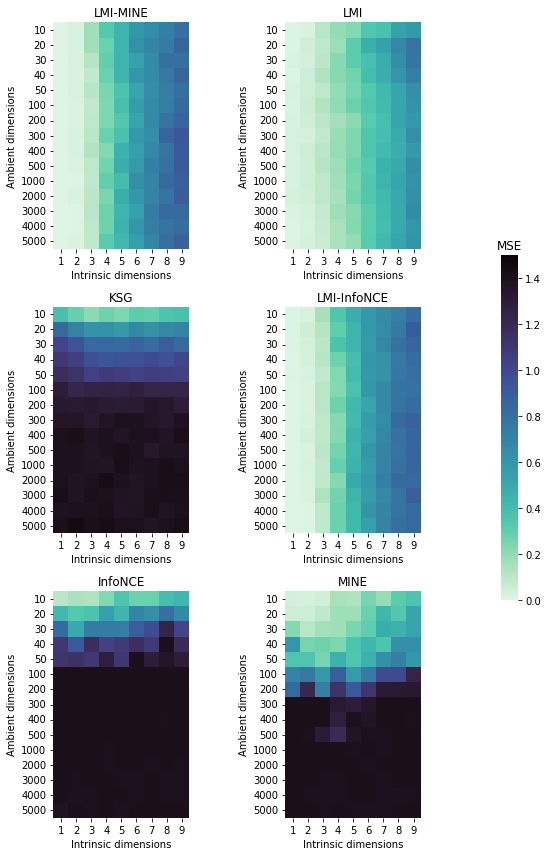

In [4]:
fig, axn = plt.subplots(3, 2, sharex=False, sharey=False, 
                        figsize=fs_6grid)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

k = g6.apply(mse).unstack().fillna(0)
ests = list(set(df6['Estimator']))

for i, ax in enumerate(axn.flat):
    
    sns.heatmap(k.reset_index().pivot_table(index='Ambient dimensions',
                            columns='Intrinsic dimensions',
                            values=ests[i]), square=True, cmap='mako_r',
                ax=ax,
                cbar= i==0, linewidth=0, linecolor='grey',
                vmin=0, vmax=1.5,
                cbar_ax=None if i else cbar_ax)
    
    if not i:
        cbar = ax.collections[0].colorbar
        cbar.ax.set_title('MSE')
    
    ax.set_title(ests[i])
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    
fig.tight_layout(rect=[0, 0, .9, 1])

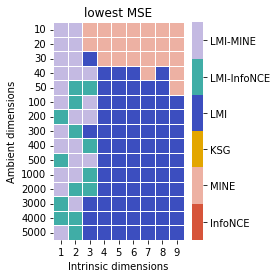

In [5]:
rcParams['figure.figsize'] = (3,4)

value_to_int = {j:i for i,j in enumerate(pd.unique(df6['Estimator'].values.ravel()))}
value_to_int
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)


bests = k.melt(ignore_index=False).reset_index().sort_values(
    'value').drop_duplicates(['Intrinsic dimensions', 'Ambient dimensions'], keep='first')

bests = bests.replace(value_to_int).pivot_table(columns='Intrinsic dimensions',
                                                 index='Ambient dimensions',
                                                 values='Estimator')

ax = sns.heatmap(bests, cmap=c6[::-1], square=True, linewidth=0.5, vmin=0) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
plt.title('lowest MSE')
plt.show()

/tmp/ipykernel_321456/941282239.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


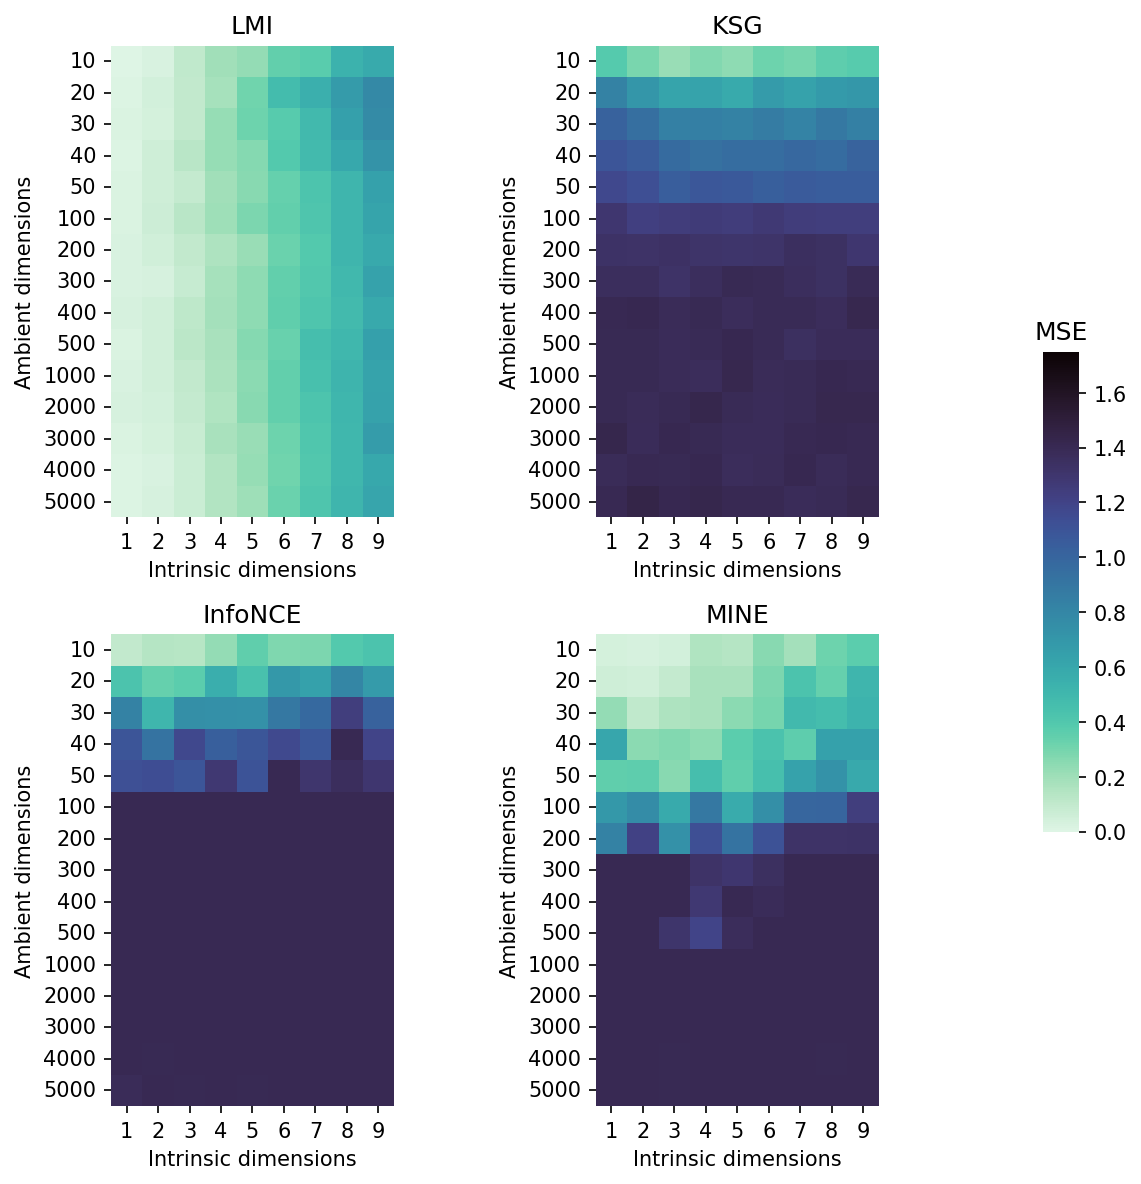

In [6]:
fig, axn = plt.subplots(2, 2, 
                        figsize=fs_4grid, dpi=150)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

k = g4.apply(mse).unstack().fillna(0)
ests = list(set(df4['Estimator']))
for i, ax in enumerate(axn.flat):
    sns.heatmap(k.reset_index().pivot_table(index='Ambient dimensions',
                            columns='Intrinsic dimensions',
                            values=ests[i]), square=True, cmap='mako_r',
                ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1.75, #linewidth=0.05,
                cbar_ax=None if i else cbar_ax)
    if not i:
        cbar = ax.collections[0].colorbar
        cbar.ax.set_title('MSE')
        
    ax.set_title(ests[i])
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

fig.tight_layout(rect=[0, 0, .9, 1])

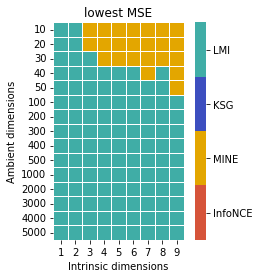

In [7]:
rcParams['figure.figsize'] = fs_grid

value_to_int = {j:i for i,j in enumerate(pd.unique(df4['Estimator'].values.ravel()))}
value_to_int
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)


bests = k.melt(ignore_index=False).reset_index().sort_values(
    'value').drop_duplicates(['Intrinsic dimensions', 'Ambient dimensions'], keep='first')

bests = bests.replace(value_to_int).pivot_table(columns='Intrinsic dimensions',
                                                 index='Ambient dimensions',
                                                 values='Estimator')

ax = sns.heatmap(bests, cmap=c4[::-1], square=True, linewidth=0.5, vmin=0) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
plt.title('lowest MSE')
plt.show()

/tmp/ipykernel_321456/668093312.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


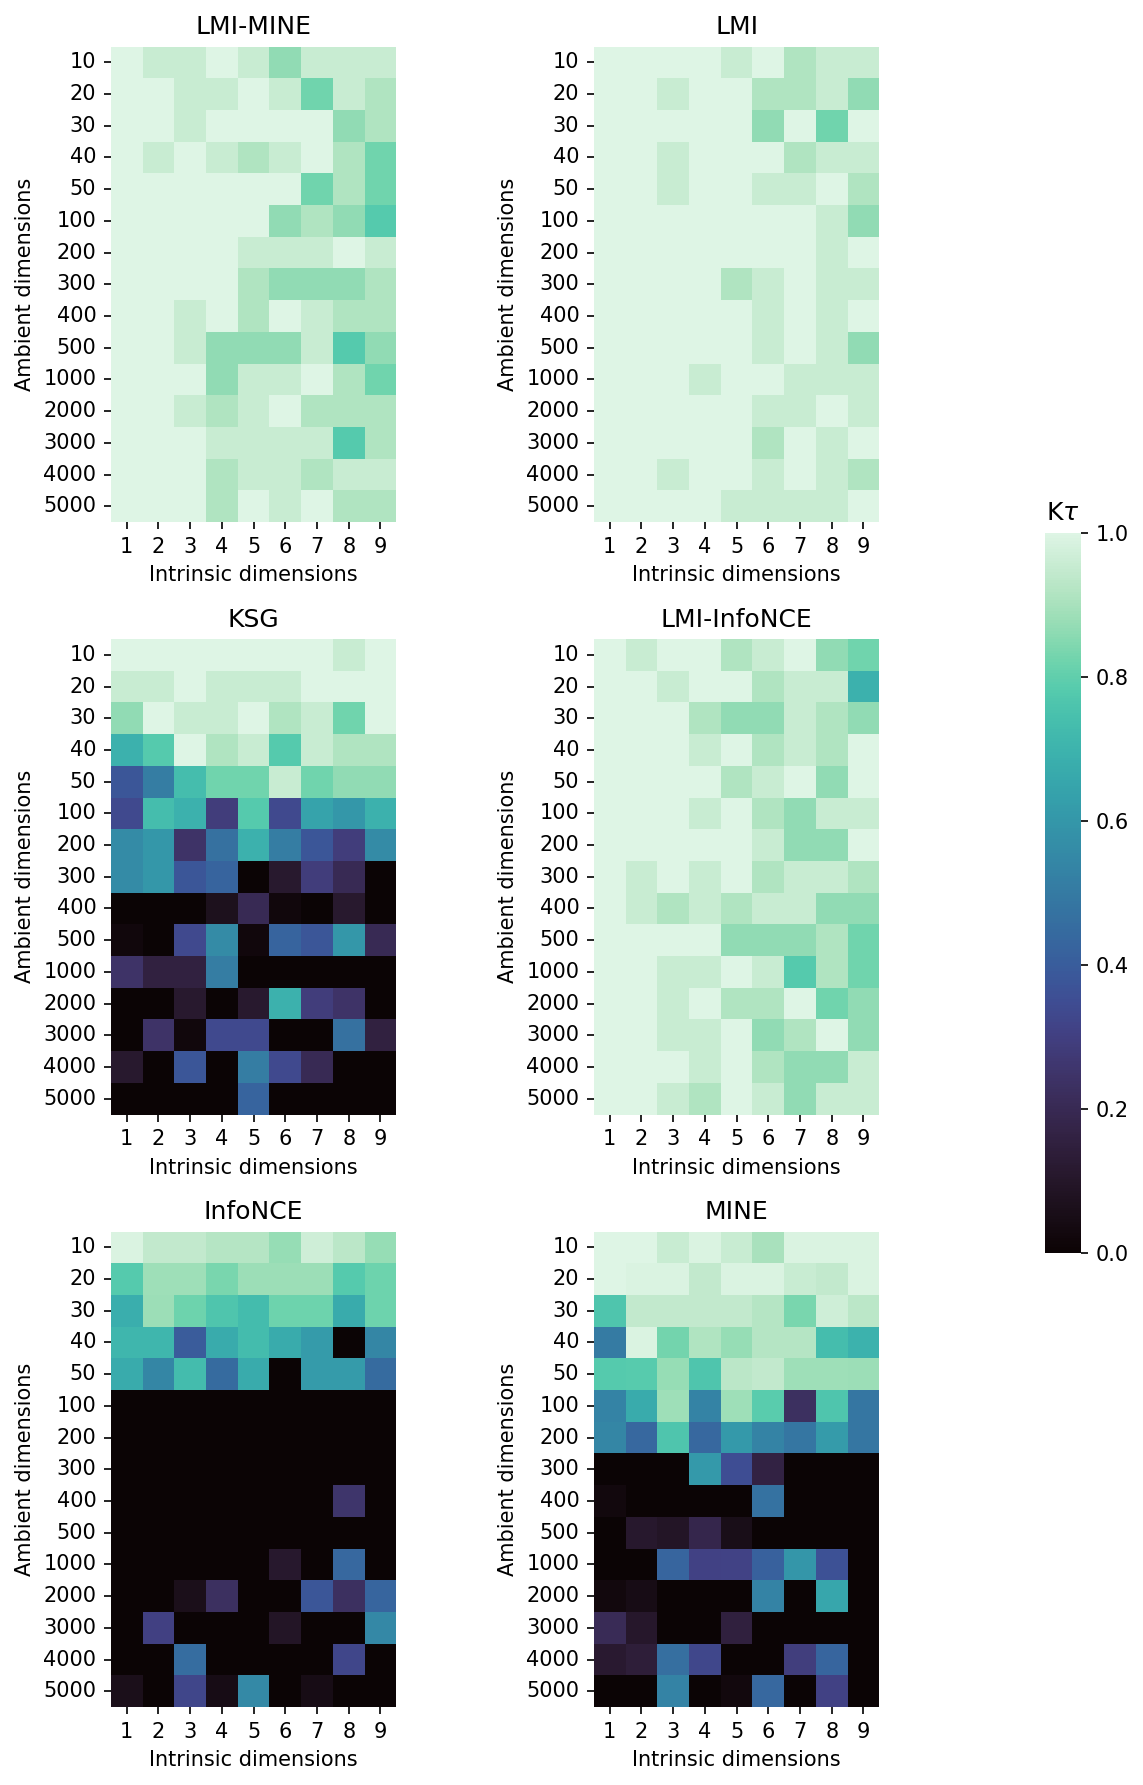

In [8]:
fig, axn = plt.subplots(3, 2,
                        figsize=fs_6grid, dpi=150)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

k = g6.apply(kendall).unstack().fillna(0)
ests = list(set(df6['Estimator']))
for i, ax in enumerate(axn.flat):
    sns.heatmap(k.reset_index().pivot_table(index='Ambient dimensions',
                            columns='Intrinsic dimensions',
                            values=ests[i]), square=True, cmap='mako',
                ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cbar_ax=None if i else cbar_ax)
    if not i:
        cbar = ax.collections[0].colorbar
        cbar.ax.set_title('K$\\tau$')
        
    ax.set_title(ests[i])
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

fig.tight_layout(rect=[0, 0, .9, 1])

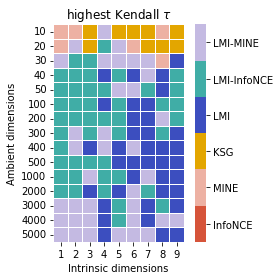

In [9]:
rcParams['figure.figsize'] = fs_grid
value_to_int = {j:i for i,j in enumerate(pd.unique(df6['Estimator'].values.ravel()))}
value_to_int
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)


bests = k.melt(ignore_index=False).reset_index().sort_values(
    'value').drop_duplicates(['Intrinsic dimensions', 'Ambient dimensions'], keep='last')

bests = bests.replace(value_to_int).pivot_table(columns='Intrinsic dimensions',
                                                 index='Ambient dimensions',
                                                 values='Estimator')

ax = sns.heatmap(bests, cmap=c6[::-1], square=True, linewidth=0.5, vmin=0) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
plt.title('highest Kendall $\\tau$')
plt.show()

/tmp/ipykernel_321456/2365102830.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


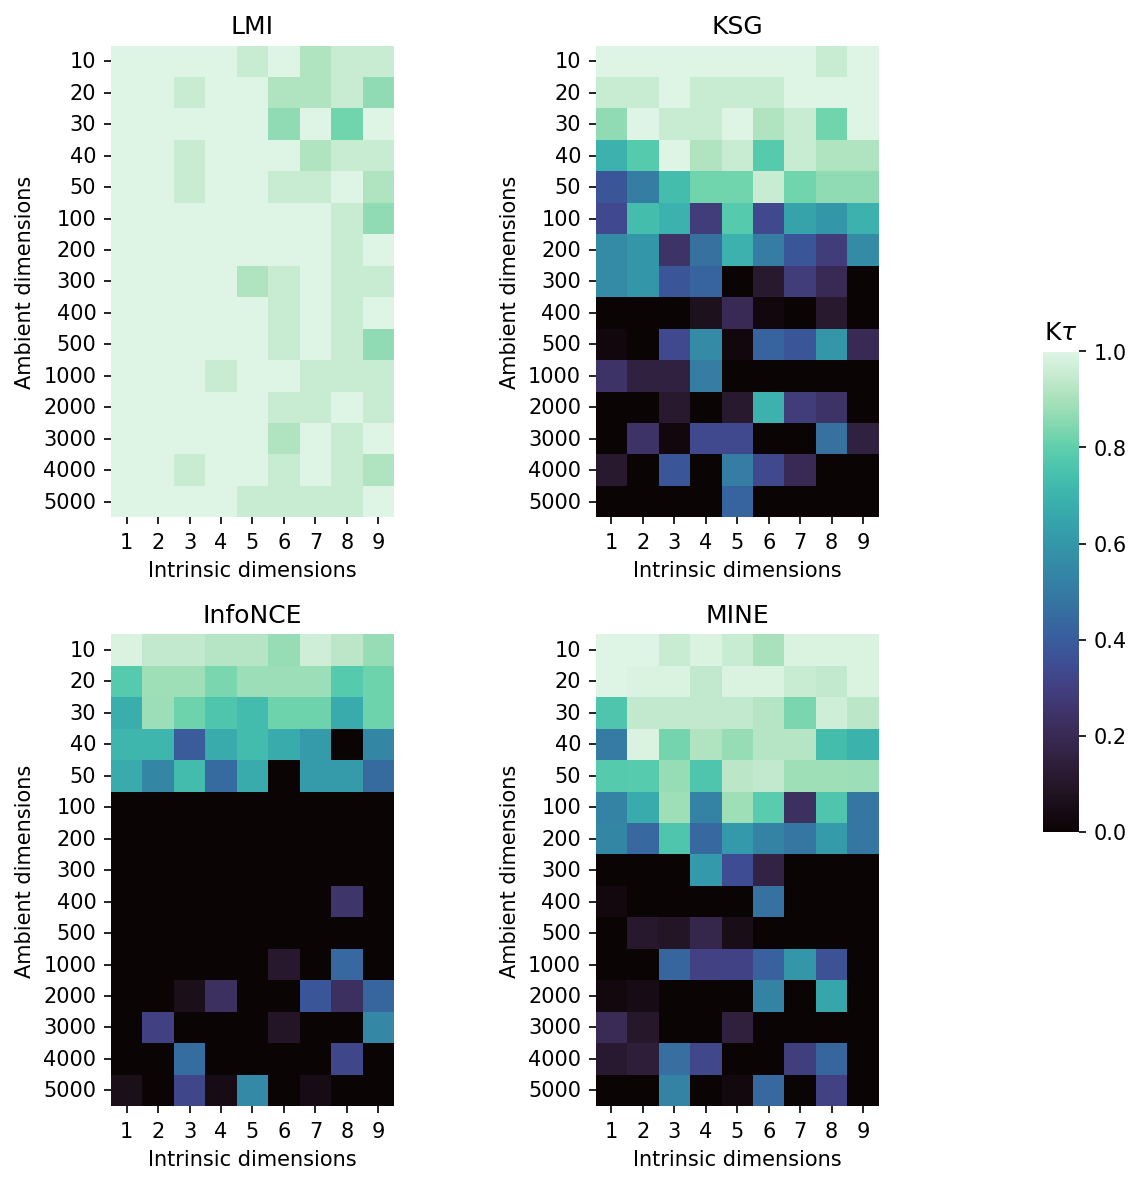

In [10]:
fig, axn = plt.subplots(2, 2,
                        figsize=fs_4grid, dpi=150)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

k = g4.apply(kendall).unstack().fillna(0)
ests = list(set(df4['Estimator']))
for i, ax in enumerate(axn.flat):
    sns.heatmap(k.reset_index().pivot_table(index='Ambient dimensions',
                            columns='Intrinsic dimensions',
                            values=ests[i]), square=True, cmap='mako',
                ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cbar_ax=None if i else cbar_ax)
    if not i:
        cbar = ax.collections[0].colorbar
        cbar.ax.set_title('K$\\tau$')
        
    ax.set_title(ests[i])
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
fig.tight_layout(rect=[0, 0, .9, 1])

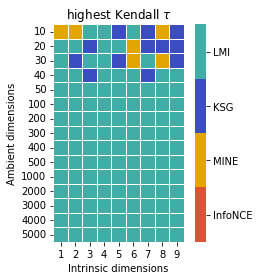

In [11]:
rcParams['figure.figsize'] = fs_grid

value_to_int = {j:i for i,j in enumerate(pd.unique(df4['Estimator'].values.ravel()))}
value_to_int
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)


bests = k.melt(ignore_index=False).reset_index().sort_values(
    'value').drop_duplicates(['Intrinsic dimensions', 'Ambient dimensions'], keep='last')

bests = bests.replace(value_to_int).pivot_table(columns='Intrinsic dimensions',
                                                 index='Ambient dimensions',
                                                 values='Estimator')

ax = sns.heatmap(bests, cmap=c4[::-1], square=True, linewidth=0.5, vmin=0) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
plt.title('highest Kendall $\\tau$')
plt.show()